In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [31]:
df = pd.read_csv('df_preprocessed.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Drizzle,Snow,Wintry Mix,Freezing Rain,MONTH_sin,MONTH_cos,DAY_OF_MONTH_sin,DAY_OF_MONTH_cos,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos
0,11,1,5,3,10,0,124,636,324,323,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
1,11,1,5,3,28,0,371,2475,340,333,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
2,11,1,5,3,20,1,181,1069,301,341,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
3,11,1,5,3,30,0,168,944,345,343,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
4,11,1,5,4,1,0,139,760,360,356,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521


In [32]:
X = df.drop(['DEP_DELAY'], axis=1)
y = df['DEP_DELAY']
y = y.ravel()
print(X.shape, y.shape)


(28820, 35) (28820,)


In [39]:
#smote
sm = SMOTE(random_state=42)

X, y = sm.fit_resample(X, y)
print(X.shape, y.shape)

(49892, 35) (49892,)


In [44]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#boruta feature selection
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter=25)

(39913, 35) (39913,)
(9979, 35) (9979,)


In [45]:
feat_selector.fit(X_train.values, y_train)

X_train = feat_selector.transform(X_train.values)

X_test = feat_selector.transform(X_test.values)

Iteration: 	1 / 25
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	2 / 25
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	3 / 25
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	4 / 25
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	5 / 25
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	6 / 25
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	7 / 25
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	8 / 25
Confirmed: 	30
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 25
Confirmed: 	30
Tentative: 	3
Rejected: 	2
Iteration: 	10 / 25
Confirmed: 	30
Tentative: 	3
Rejected: 	2
Iteration: 	11 / 25
Confirmed: 	30
Tentative: 	3
Rejected: 	2
Iteration: 	12 / 25
Confirmed: 	30
Tentative: 	3
Rejected: 	2
Iteration: 	13 / 25
Confirmed: 	30
Tentative: 	3
Rejected: 	2
Iteration: 	14 / 25
Confirmed: 	30
Tentative: 	3
Rejected: 	2
Iteration: 	15 / 25
Confirmed: 	30
Tentative: 	3
Rejected: 	2
Iteration: 	16 / 25
Confirmed: 	30
Tentative: 	3
Rejected: 	2
Iteration: 	17 / 

In [52]:
#knn, randomforest, logistic regression, decision tree, gaussian naive bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
models = [KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]
dic = {}
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #accuracy precision, recall f1 score
    dic[model] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('precision: ', precision_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1 score: ', f1_score(y_test, y_pred))
    print()

accuracy:  0.9740454955406354
precision:  0.9572616515180816
recall:  0.9923817161186849
f1 score:  0.9745053647012502

accuracy:  0.9387714199819621
precision:  0.9830059589494593
recall:  0.8929430633520449
f1 score:  0.9358125853556046



C:\Users\saras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.6121855897384507
precision:  0.6154481619165634
recall:  0.5974338412189254
f1 score:  0.6063072227873856

accuracy:  0.9173263854093596
precision:  0.9222966118888213
recall:  0.9113873295910184
f1 score:  0.9168095190077645

accuracy:  0.7138991882954204
precision:  0.6997565087094961
recall:  0.7489975942261428
f1 score:  0.7235402343371744



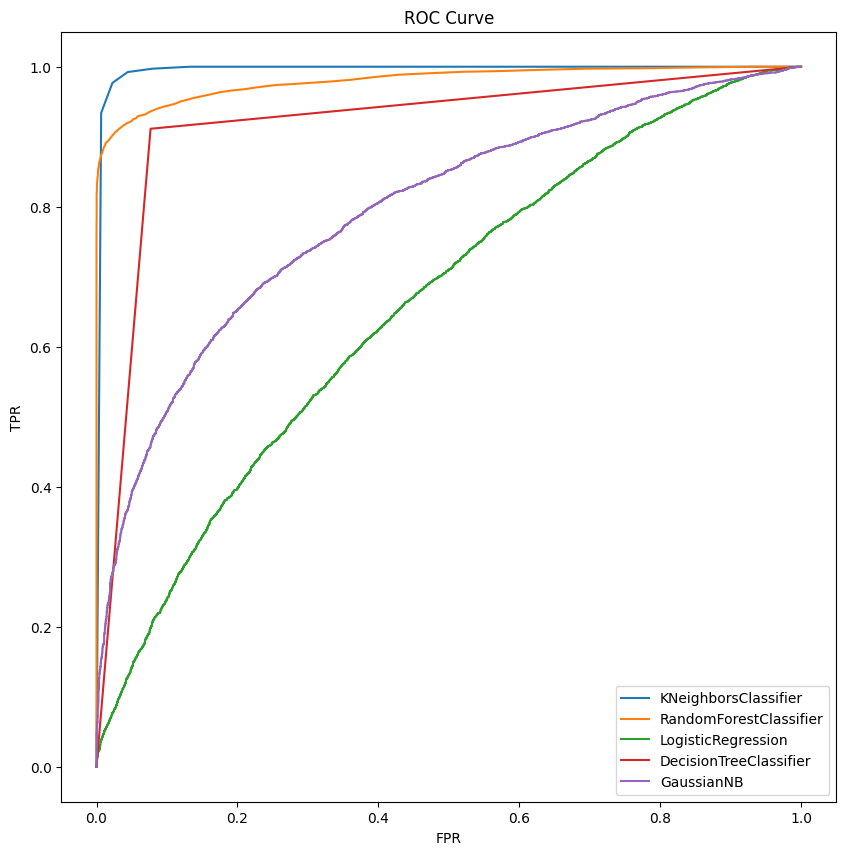

In [53]:
#plot it
plt.figure(figsize=(10, 10))
for model in dic:
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=model.__class__.__name__)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc='best')

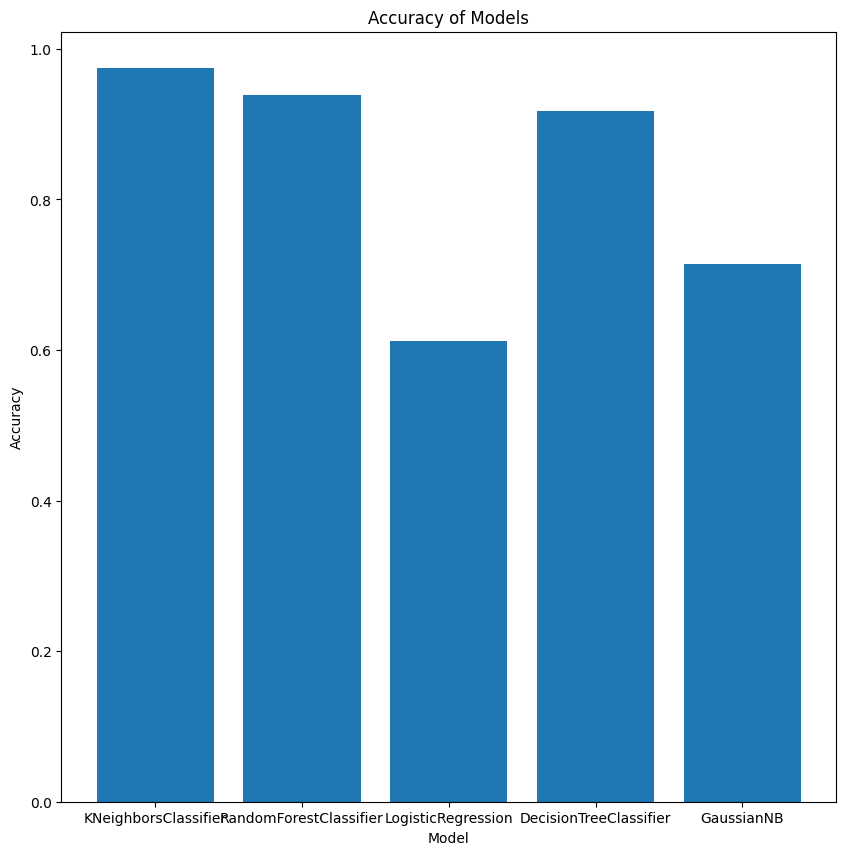

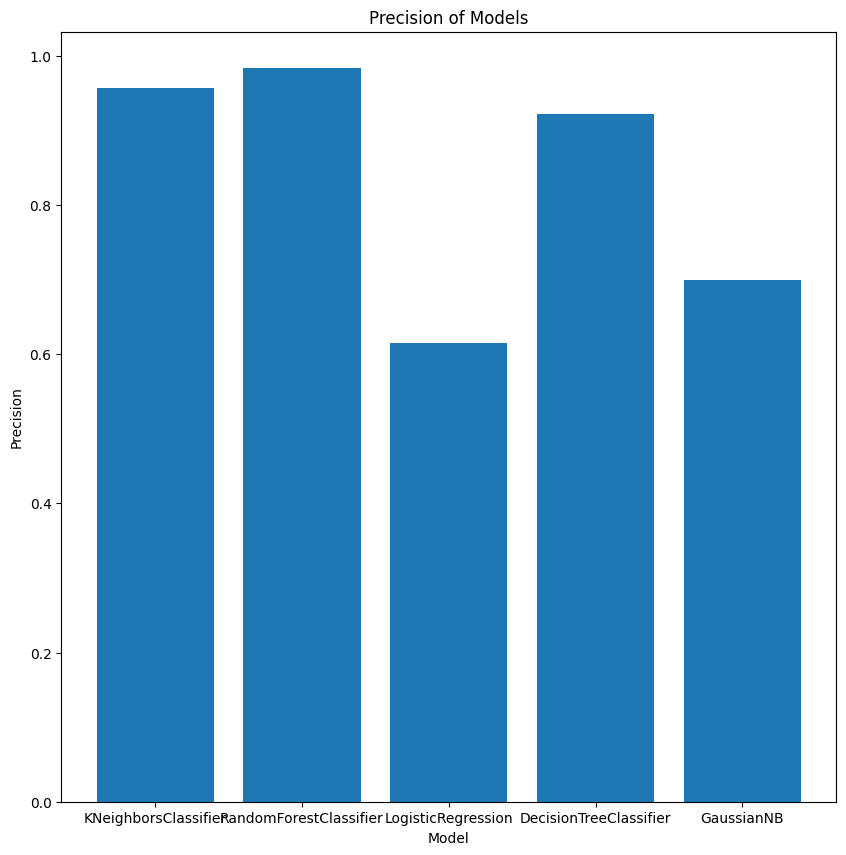

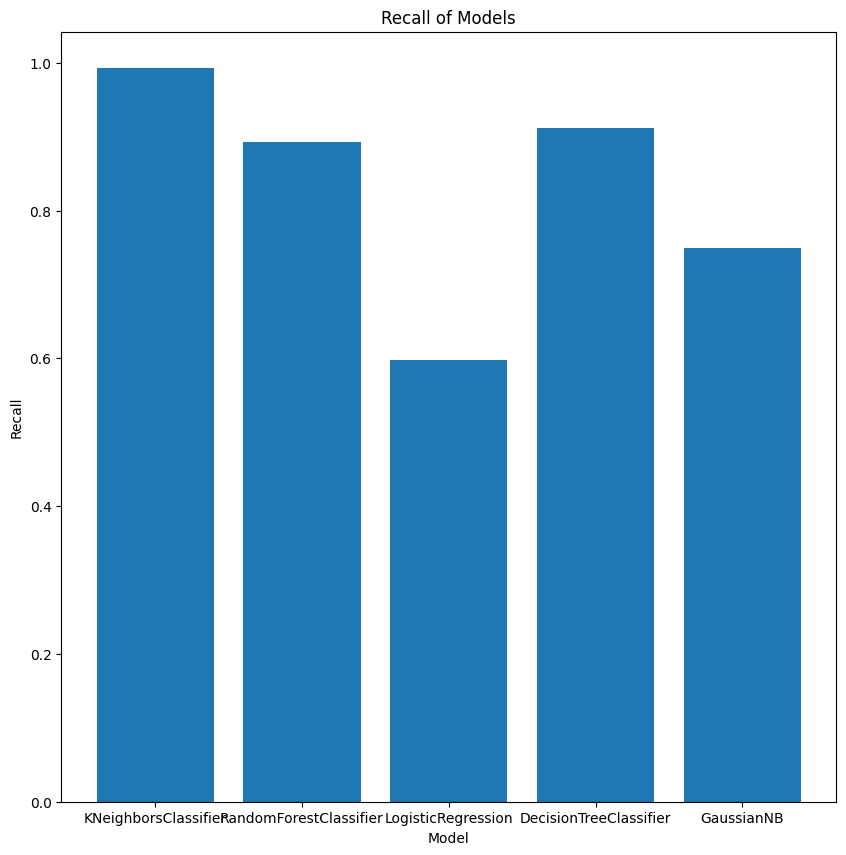

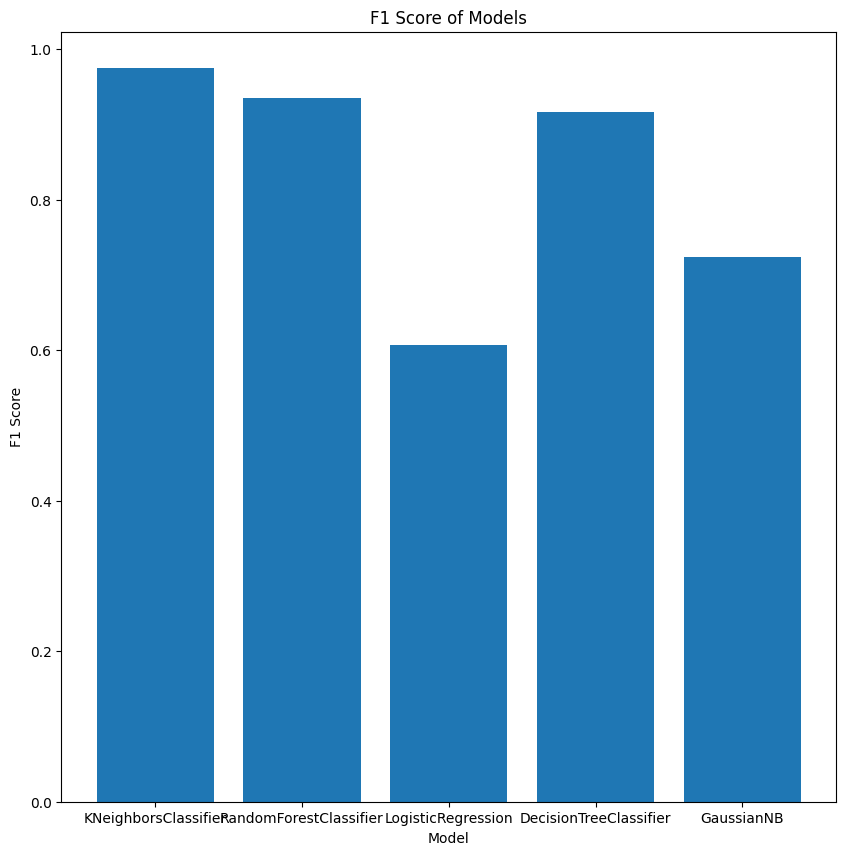

In [54]:
#plot accuracy, precision , recall, f1 score in bar graph format
plt.figure(figsize=(10, 10))
plt.bar(range(len(dic)), [dic[model][0] for model in dic], align='center')
plt.xticks(range(len(dic)), [model.__class__.__name__ for model in dic])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

plt.figure(figsize=(10, 10))
plt.bar(range(len(dic)), [dic[model][1] for model in dic], align='center')
plt.xticks(range(len(dic)), [model.__class__.__name__ for model in dic])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision of Models')
plt.show()

plt.figure(figsize=(10, 10))
plt.bar(range(len(dic)), [dic[model][2] for model in dic], align='center')
plt.xticks(range(len(dic)), [model.__class__.__name__ for model in dic])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall of Models')
plt.show()

plt.figure(figsize=(10, 10))
plt.bar(range(len(dic)), [dic[model][3] for model in dic], align='center')
plt.xticks(range(len(dic)), [model.__class__.__name__ for model in dic])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score of Models')
plt.show()
